In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from netCDF4 import Dataset as NetCDFFile
import random 
import timeit
import pickle
from scipy import stats
import xarray as xr
import pandas as pd 
import statistics
from scipy import interpolate
from scipy import signal
import os

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


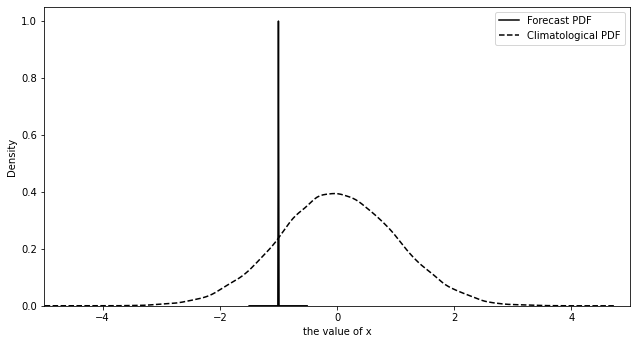

In [2]:
f=plt.figure()
imp = signal.unit_impulse(100, 'mid')
plt.plot(np.arange(-0.5, 0.5,0.01)-1, imp, 'k',label='Forecast PDF')

from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(random.normal(size=30000), kde_kws={'linestyle':'--'},hist=False, label='Climatological PDF',color='k')
plt.xlim([-5,5])
plt.xlabel('the value of x')
plt.legend()
f.set_size_inches(10.5,5.5)
f.savefig( "/content/drive/MyDrive/website-hugo/chaos_and_predictability/week1/FIG1.png")

In [3]:
# RK4 for Lorenz 63 model

# using RK4 to derive the data for training 
# function to be solved
def f(y,sigma,rho,beta):
    dy = np.zeros(np.shape(y))
    dy[0] = sigma*(y[1]-y[0])
    dy[1] = y[0]*(rho-y[2])
    dy[2] = y[0]*y[1]-beta*y[2]
    return dy

# or
# f = lambda x: x+y

# RK-4 method
def rk4(x0,y0,xn,n,sigma,rho,beta):
    
    # Calculating step size
    h = (xn-x0)/n
    
    #print('\n--------SOLUTION--------')
    #print('-------------------------')    
    #print('x0\ty0\tyn')
    #print('-------------------------')
    for i in range(n):
        k1 = h * (f(y0,sigma,rho,beta))
        k2 = h * (f((y0+k1/2),sigma,rho,beta))
        k3 = h * (f((y0+k2/2),sigma,rho,beta))
        k4 = h * (f((y0+k3),sigma,rho,beta))
        k = (k1+2*k2+2*k3+k4)/6
        yn = y0 + k
        #print('%.4f\t%.4f\t%.4f'% (x0,y0,yn) )
        #print('-------------------------')
        y0 = yn
        x0 = x0+h
    return yn
    #print('\nAt x=%.4f, y=%.4f' %(xn,yn))

In [4]:
# Inputs
print('Enter initial conditions:')
x0 = 0
y0 = [0,0.1,0]
rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0
y_record = np.zeros((3,50000))
print('Enter calculation point: ')
xn = 0.01

print('Enter number of steps:')
step = 100
y_record[:,0] = y0
# RK4 method call
for i in range(1,np.shape(y_record)[1]):
    y_record[:,i] = rk4(x0,y_record[:,i-1],xn,step, sigma,rho,beta)


Enter initial conditions:
Enter calculation point: 
Enter number of steps:


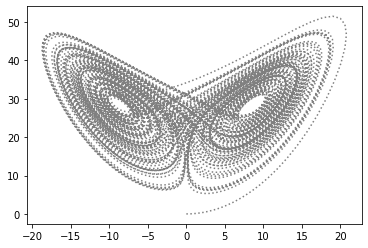

In [6]:
plt.figure()
plt.plot(y_record[0,0:10000],y_record[2,0:10000],color='gray',linestyle='dotted')

In [7]:
def rmse(y1,y2):
    dy = (y1-y2)**2
    dy = np.sum(dy)
    return dy

In [8]:
dy = np.zeros((50000))
for i in range(50000):
    dy[i] = rmse(y_record[:,i],[0,0,16])
np.min(dy)

0.029147957326795586

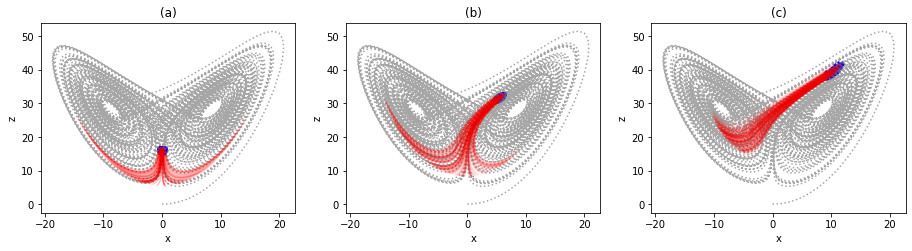

In [32]:
fig=plt.figure()
plt.subplot(1,3,1)
dy = np.zeros((50000))
for i in range(50000):
    dy[i] = rmse(y_record[:,i],[0,0,16])
np.min(dy)
posi1 = np.squeeze(np.where(dy<np.percentile(dy,0.5)))
plt.plot(y_record[0,0:10000],y_record[2,0:10000],color='gray',linestyle='dotted',alpha=0.7)
for i in range(np.size(posi1)-1):
    plt.plot(y_record[0,posi1[i]:posi1[i]+40],y_record[2,posi1[i]:posi1[i]+40],color='red',alpha=0.05)
plt.scatter(y_record[0,posi1],y_record[2,posi1],color='blue',s=2)
plt.title('(a)')
plt.xlabel('x')
plt.ylabel('z')


plt.subplot(1,3,2)
dy = np.zeros((50000))
for i in range(50000):
    dy[i] = rmse(y_record[:,i],[5,-1,32])
np.min(dy)
posi2 = np.squeeze(np.where(dy<np.percentile(dy,0.5)))
plt.plot(y_record[0,0:10000],y_record[2,0:10000],color='gray',linestyle='dotted',alpha=0.7)
for i in range(np.size(posi2)-1):
    plt.plot(y_record[0,posi2[i]:posi2[i]+50],y_record[2,posi2[i]:posi2[i]+50],color='red',alpha=0.05)
plt.scatter(y_record[0,posi2],y_record[2,posi2],color='blue',s=2)    
plt.title('(b)')
plt.xlabel('x')
plt.ylabel('z')

plt.subplot(1,3,3)
dy = np.zeros((50000))
for i in range(50000):
    dy[i] = rmse(y_record[:,i],[10,-1,40])
np.min(dy)
posi3 = np.squeeze(np.where(dy<np.percentile(dy,0.5)))
plt.plot(y_record[0,0:10000],y_record[2,0:10000],color='gray',linestyle='dotted',alpha=0.7)
for i in range(np.size(posi3)-1):
    plt.plot(y_record[0,posi3[i]:posi3[i]+40],y_record[2,posi3[i]:posi3[i]+40],color='red',alpha=0.05)
plt.scatter(y_record[0,posi3],y_record[2,posi3],color='blue',s=2)
plt.title('(c)')
plt.xlabel('x')
plt.ylabel('z')

fig.set_size_inches(15.5, 3.5)    
fig.savefig( "/content/drive/MyDrive/website-hugo/chaos_and_predictability/week1/FIG2.png", dpi=300, bbox_inches='tight')

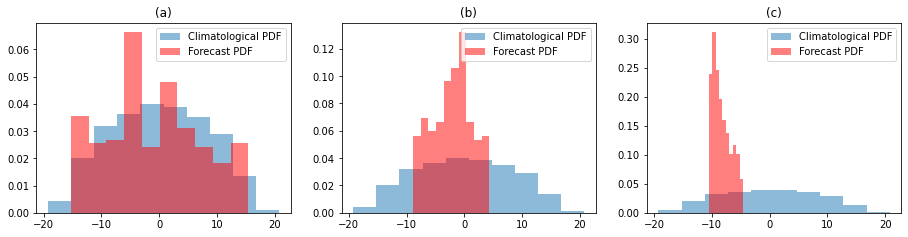

In [14]:
fig=plt.figure()
plt.subplot(1,3,1)
plt.hist(y_record[0,:],density=True,alpha=0.5, label='Climatological PDF')
plt.hist(y_record[0,posi1[0:-20]+40],density=True,alpha=0.5,color='r', label='Forecast PDF')
plt.legend()
plt.title('(a)')


plt.subplot(1,3,2)
plt.hist(y_record[0,:],density=True,alpha=0.5, label='Climatological PDF')
plt.hist(y_record[0,posi2[0:-20]+40],density=True,alpha=0.5,color='r', label='Forecast PDF')
plt.legend()
plt.title('(b)')


plt.subplot(1,3,3)
plt.hist(y_record[0,:],density=True,alpha=0.5, label='Climatological PDF')
plt.hist(y_record[0,posi3[0:-20]+40],density=True,alpha=0.5,color='r', label='Forecast PDF')
fig.set_size_inches(15.5, 3.5)    
plt.legend()
plt.title('(c)')

fig.savefig( "/content/drive/MyDrive/website-hugo/chaos_and_predictability/week1/FIG3.png", dpi=300, bbox_inches='tight')